# Introduction to Python

## Biostats Computing Workshop

### Motivational Example

<img src="http://images1.villagevoice.com/imager/u/original/6699280/got21.jpg" style="width: 600px;">

In [1]:
 ## SO MANY LIBRARIES
from bs4 import BeautifulSoup as bs ## Importing an Object!
from urllib2 import urlopen ## Importing some functions!
from urllib import urlretrieve
import unicodedata
import os
import sys
from __future__ import division ## Oddity with division

In [2]:
URL = "http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones.html" ## CAPS = GLOBAL CONSTANT

In [12]:
soup = bs(urlopen(URL)) ### Creating a 'bs' object here

<img src="soup_members.png">

In [12]:
i = 0
# chapters = []
for link in soup.find_all('a'): ## This is what a 'for loop' looks like in python
    if "George_R.R._Martin/A_Game_of_Thrones/" in link.get('href'): # some if statements!
        print(link.get('href'))
        # chapters.append(link.get('href'))
        i+=1
    if i > 6:
        break

/George_R.R._Martin/A_Game_of_Thrones/01.html
/George_R.R._Martin/A_Game_of_Thrones/02.html
/George_R.R._Martin/A_Game_of_Thrones/03.html
/George_R.R._Martin/A_Game_of_Thrones/04.html
/George_R.R._Martin/A_Game_of_Thrones/05.html
/George_R.R._Martin/A_Game_of_Thrones/06.html
/George_R.R._Martin/A_Game_of_Thrones/07.html


## OOOOOO LIST COMPREHENSION

In [13]:
chapters = [ link.get('href') for link in soup.find_all('a') 
            if "George_R.R._Martin/A_Game_of_Thrones/" in link.get('href')]
chapters[:5]

['/George_R.R._Martin/A_Game_of_Thrones/01.html',
 '/George_R.R._Martin/A_Game_of_Thrones/02.html',
 '/George_R.R._Martin/A_Game_of_Thrones/03.html',
 '/George_R.R._Martin/A_Game_of_Thrones/04.html',
 '/George_R.R._Martin/A_Game_of_Thrones/05.html']

In [14]:
## lets check this out for chapter 1
chapter1_url = URL[:-5] + chapters[0][len(chapters[0])-8:] ## look at this fancy string slicing!!!

```
URL[:-5] ## gets everything but the last five characters in the string
http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones     .html
```

```
chapters[0][len(chapters[0])-8:] ## lets break this down one piece at a time
```

```
chapters[0] ## this is the object holding the text string for the first chapter
>>/George_R.R._Martin/A_Game_of_Thrones/01.html'
```

```
## I'm now accessing a string object, but now I only want the last 8 characters!
len(chapters[0]) ## gives me the entire length of the string
len(chapters[0])-8 ## Length of string minus 8
chapters[0][len(chapters[0])-8:] 
#Gives me the entire string of the first chapter url, starting 8 characters back
>>/01.html
```

```
URL[:-5] + chapters[0][len(chapters[0])-8:] ## I stick the two strings together with the '+' sign!
```

In [15]:
chapter1_url

'http://www.readbooksvampire.com/George_R.R._Martin/A_Game_of_Thrones/01.html'

In [16]:
soup_1 = bs(urlopen(chapter1_url)) ## Creating a Soup Object!

In [80]:
# soup_1.get_text()

## lets get the whole book

##### What would this look like in a for loop?

In [15]:
chapter_num = 1
for chapter in chapters: ## notice the arbitrary indexing -- this is a property called __iter__ for iteration
    chapter_num_url = URL[:-5] + chapters[0][len(chapter)-8:]
    bs(urlopen(chapter_num_url)).get_text()

### Lets be cool and use a list comprehension

In [29]:
def get_GoT(chapter):
    """
    Returns all the GoT text within the parameter chapter
    P.S. Docstrings are great for making sure other people
    who read your code know what you're doing with your
    custom functions and objects
    """
    chapter_num_url = URL[:-5] + chapter[len(chapter)-8:]
    return bs(urlopen(chapter_num_url)).get_text()

In [30]:
GoT = [get_GoT(chapter) for chapter in chapters] ## takes a couple minutes

### Not always wise to do this, servers and their admins will be upset if you make a lot of requests in a short amount of time

In [31]:
len(GoT),len(chapters)

(72, 72)

In [32]:
GoT[0][:100]

u'\n\nA Game of Thrones(Song of Ice and Fire Book 1) by George R.R. Martin | Chapter One | Read Vampire '

In [33]:
GoT[71][:100] ## zero indexed arrays/lists

u'\n\nA Game of Thrones(Song of Ice and Fire Book 1) by George R.R. Martin | Chapter Seventy-two | Read '

In [34]:
type(GoT[0]),type(unicodedata.normalize('NFKD', GoT[0]).encode('ascii','ignore'))

(unicode, str)

In [35]:
GoT = [unicodedata.normalize('NFKD',chapter).encode('ascii','ignore') for chapter in GoT] ## Another LC!

In [102]:
!mkdir GoT

In [16]:
os.chdir("GoT")

In [122]:
for chapter_num in range(1,73):
    with open("Chapter "+str(chapter_num) + ".txt","w") as chap: ## file access!
        chap.write(GoT[chapter_num-1])

In [36]:
book_string = ""
for chapter in GoT:
    book_string += chapter

In [37]:
len(book_string)

1616629

In [38]:
with open("GoT_bookone.txt","w") as book:
    book.write(book_string)

In [10]:
!ls

Chapter 1.txt   Chapter 23.txt  Chapter 37.txt  Chapter 50.txt  Chapter 64.txt
Chapter 10.txt  Chapter 24.txt  Chapter 38.txt  Chapter 51.txt  Chapter 65.txt
Chapter 11.txt  Chapter 25.txt  Chapter 39.txt  Chapter 52.txt  Chapter 66.txt
Chapter 12.txt  Chapter 26.txt  Chapter 4.txt   Chapter 53.txt  Chapter 67.txt
Chapter 13.txt  Chapter 27.txt  Chapter 40.txt  Chapter 54.txt  Chapter 68.txt
Chapter 14.txt  Chapter 28.txt  Chapter 41.txt  Chapter 55.txt  Chapter 69.txt
Chapter 15.txt  Chapter 29.txt  Chapter 42.txt  Chapter 56.txt  Chapter 7.txt
Chapter 16.txt  Chapter 3.txt   Chapter 43.txt  Chapter 57.txt  Chapter 70.txt
Chapter 17.txt  Chapter 30.txt  Chapter 44.txt  Chapter 58.txt  Chapter 71.txt
Chapter 18.txt  Chapter 31.txt  Chapter 45.txt  Chapter 59.txt  Chapter 72.txt
Chapter 19.txt  Chapter 32.txt  Chapter 46.txt  Chapter 6.txt   Chapter 8.txt
Chapter 2.txt   Chapter 33.txt  Chapter 47.txt  Chapter 60.txt  Chapter 9.txt
Chapter 20.txt  Chapter 34.txt  Chapter 48.txt  Chapter

<img src="http://cdn.pastemagazine.com/www/system/images/photo_albums/game-of-thrones-memes/large/13883.jpg?1384968217">

In [22]:
import re ## regular expressions library

In [40]:
wic = re.findall("[Ww][Ii][Nn][Tt][Ee][Rr] [Ii][Ss] [Cc][Oo][Mm][Ii][Nn][Gg]",book_string)
wic,len(wic)

(['winter is coming',
  'Winter is coming',
  'Winter is coming',
  'winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'Winter is coming',
  'winter is coming',
  'Winter is coming'],
 11)

In [41]:
Starks= "[Ww][Ii][Nn][Tt][Ee][Rr] [Ii][Ss] [Cc][Oo][Mm][Ii][Nn][Gg]"
Lannisters = "[Aa] [Ll]annister [Aa]lways [Pp]ays [Hh]is debts"
Lannister_actual = "[Hh]ear [Mm]e [Rr]oar!"

In [42]:
search_string = re.compile(Starks)
find = search_string.search(book_string)

In [43]:
find.span()

(21266, 21282)

In [44]:
for position in search_string.finditer(book_string):
    print position.start()

21266
21561
103321
300227
313673
392475
420761
730895
780740
1299233
1299288


In [45]:
Stark_Positions = [position.start()/len(book_string) for position in search_string.finditer(book_string)]

In [48]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

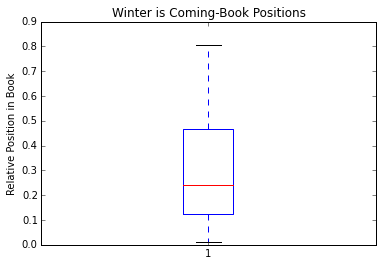

In [49]:
plt.boxplot(Stark_Positions)
plt.title("Winter is Coming-Book Positions")
plt.ylabel("Relative Position in Book")
plt.show()

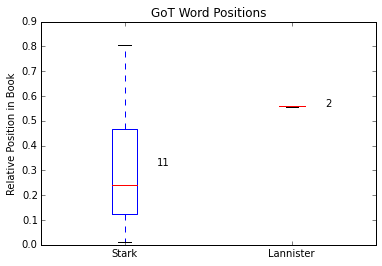

In [88]:
search_string = re.compile(Lannisters)
Lannister_positions = [position.start()/len(book_string) for position in search_string.finditer(book_string)]
plt.boxplot([Stark_Positions,Lannister_positions])
plt.title("GoT Word Positions")
plt.xticks([1,2],["Stark","Lannister"])
plt.text(1.2,np.mean(Stark_Positions),str(len(Stark_Positions)))
plt.text(2.2,np.mean(Lannister_positions),str(len(Lannister_positions)))
plt.ylabel("Relative Position in Book")
plt.show()

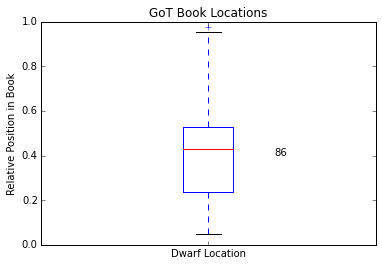

In [98]:
search_string = re.compile("[Dd]warf")
dwarf_pos = [position.start()/len(book_string) for position in search_string.finditer(book_string)]
plt.boxplot([dwarf_pos])
plt.title("GoT Book Locations")
plt.xticks([1],["Dwarf Location"])
plt.text(1.2,np.mean(dwarf_pos),str(len(dwarf_pos)))
plt.ylabel("Relative Position in Book")
plt.show()

<img src="http://cdn.pastemagazine.com/www/system/images/photo_albums/game-of-thrones-memes/large/21-memes-got-hipster-jon-snow-old-gods.jpg?1384968217">

## bonus nltk discourse if time

In [8]:
import nltk ## another library...seriously?

In [10]:
tokens = nltk.word_tokenize(book_string)

In [60]:
from collections import Counter,OrderedDict ## This is getting ridiculous

In [30]:
word_freq = Counter(tokens) ## example of dictionary
word_freq

Counter({'raining': 4,
         'mustachio': 3,
         'Greyjoy': 68,
         'yellow': 30,
         'four': 65,
         'woods': 40,
         'clotted': 2,
         'spiders': 8,
         'ornate': 12,
         'woody': 2,
         'Until': 12,
         'marching': 15,
         'dragonbone': 9,
         'unanswered': 1,
         'sunlit': 1,
         'Visitors': 1,
         'Vengeance': 1,
         'caned': 1,
         'Western': 6,
         'crossbar': 3,
         'lord': 410,
         'meadows': 1,
         'sinking': 2,
         'kennels': 5,
         'wracked': 2,
         'dreamers': 1,
         'oceans': 1,
         'bile': 1,
         'foul': 6,
         'Old': 99,
         'stabbed': 7,
         'bringing': 17,
         'banqueting': 1,
         'disturb': 3,
         'prize': 2,
         'Less': 4,
         'wooden': 66,
         'Jeren': 5,
         'Emmon': 1,
         'solid': 11,
         'persisted': 1,
         'Does': 18,
         'crotch': 1,
         'Towerso-cal

In [28]:
word_freq.most_common()[:10]

[('.', 25270),
 (',', 20777),
 ('the', 14940),
 ('and', 8551),
 ('``', 8164),
 ("''", 7830),
 ('to', 6442),
 ('of', 6195),
 ('a', 5766),
 ('his', 4529)]

In [78]:
top_nouns = {}
top_adjectives = {}
for word,freq in word_freq.most_common()[:1000]:
    if nltk.pos_tag(nltk.word_tokenize(word))[0][1] == "NN": ## getting nouns
        top_nouns[word] = freq
    elif nltk.pos_tag(nltk.word_tokenize(word))[0][1] == "JJ": ## getting adjectives
        top_adjectives[word] = freq

In [107]:
ordered_top_nouns = OrderedDict(sorted(top_nouns.items(), key=lambda x: x[1], reverse=True))
ordered_top_adjectives = OrderedDict(sorted(top_adjectives.items(),key=lambda x: x[1], reverse=True))

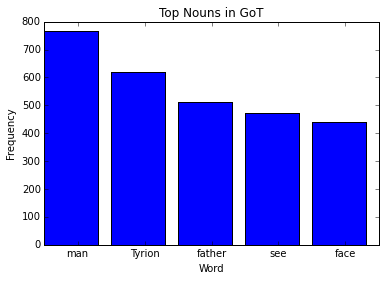

In [111]:
plt.bar(np.arange(5),ordered_top_nouns.values()[:5])
plt.xticks(np.arange(5)+.5,ordered_top_nouns.keys()[:5])
plt.title("Top Nouns in GoT")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

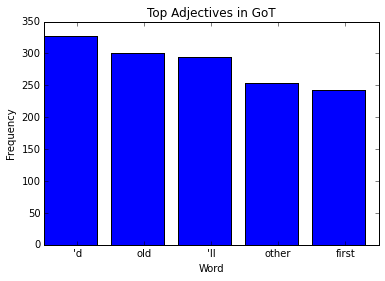

In [114]:
plt.bar(np.arange(5),ordered_top_adjectives.values()[:5])
plt.xticks(np.arange(5)+.5,ordered_top_adjectives.keys()[:5])
plt.title("Top Adjectives in GoT")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()